<a href="https://colab.research.google.com/github/leeseong10/ontology/blob/main/sharp_index%26MinimumVariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 샤프지수 포트폴리오

In [ ]:
#라이브러리 설치
!pip install -U finance-datareader

In [ ]:
#라이브러리 설치
!pip install riskfolio-lib

In [ ]:
#라이브러리 불러오기
import pandas as pd
import datetime

import FinanceDataReader as fdr
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import riskfolio as rp

In [ ]:
#날짜 설정
start_date = pd.to_datetime('20100101')
end_date = datetime.datetime.today()
end_date = pd.to_datetime(end_date)
end_date

Timestamp('2024-12-09 17:38:40.469843')

In [ ]:
#사용할 종목 설정
ticker_list=['069500','232080','QQQ','TQQQ','SQQQ','SOXL','143850','195930','238720','192090','148070','136340','182490','132030','130680','114800','138230','139660','130730' 'PLTR', 'TSLA']
name_list=['KODEX200','KOSDAQ150','QQQ','TQQQ','SQQQ','SOXL','S&P500 future(H)','STOXX50','Nikkei225','CSI300','10Y-kr','IG_corporate','US_Hiyeild','GOLD','WTI','KODEX short','Dollar','Dollar_short','MMF','PLTR','TSLA']

In [ ]:
#종목 정보 담기
df_list=[]
for a,b in zip(ticker_list,name_list):
    price_df=fdr.DataReader(a)
    Close=price_df[['Close']]
    Close.columns=[b]
    df_list.append(Close)


price_df=reduce(lambda x,y: pd.merge(x,y,left_index=True,right_index=True,how='inner'),df_list)
cash_df=pd.DataFrame([1]*len(price_df.index),columns=['Cash'],index=price_df.index)
price_df=pd.merge(price_df,cash_df,left_index=True,right_index=True)




db_price_df=price_df.loc[start_date:end_date]

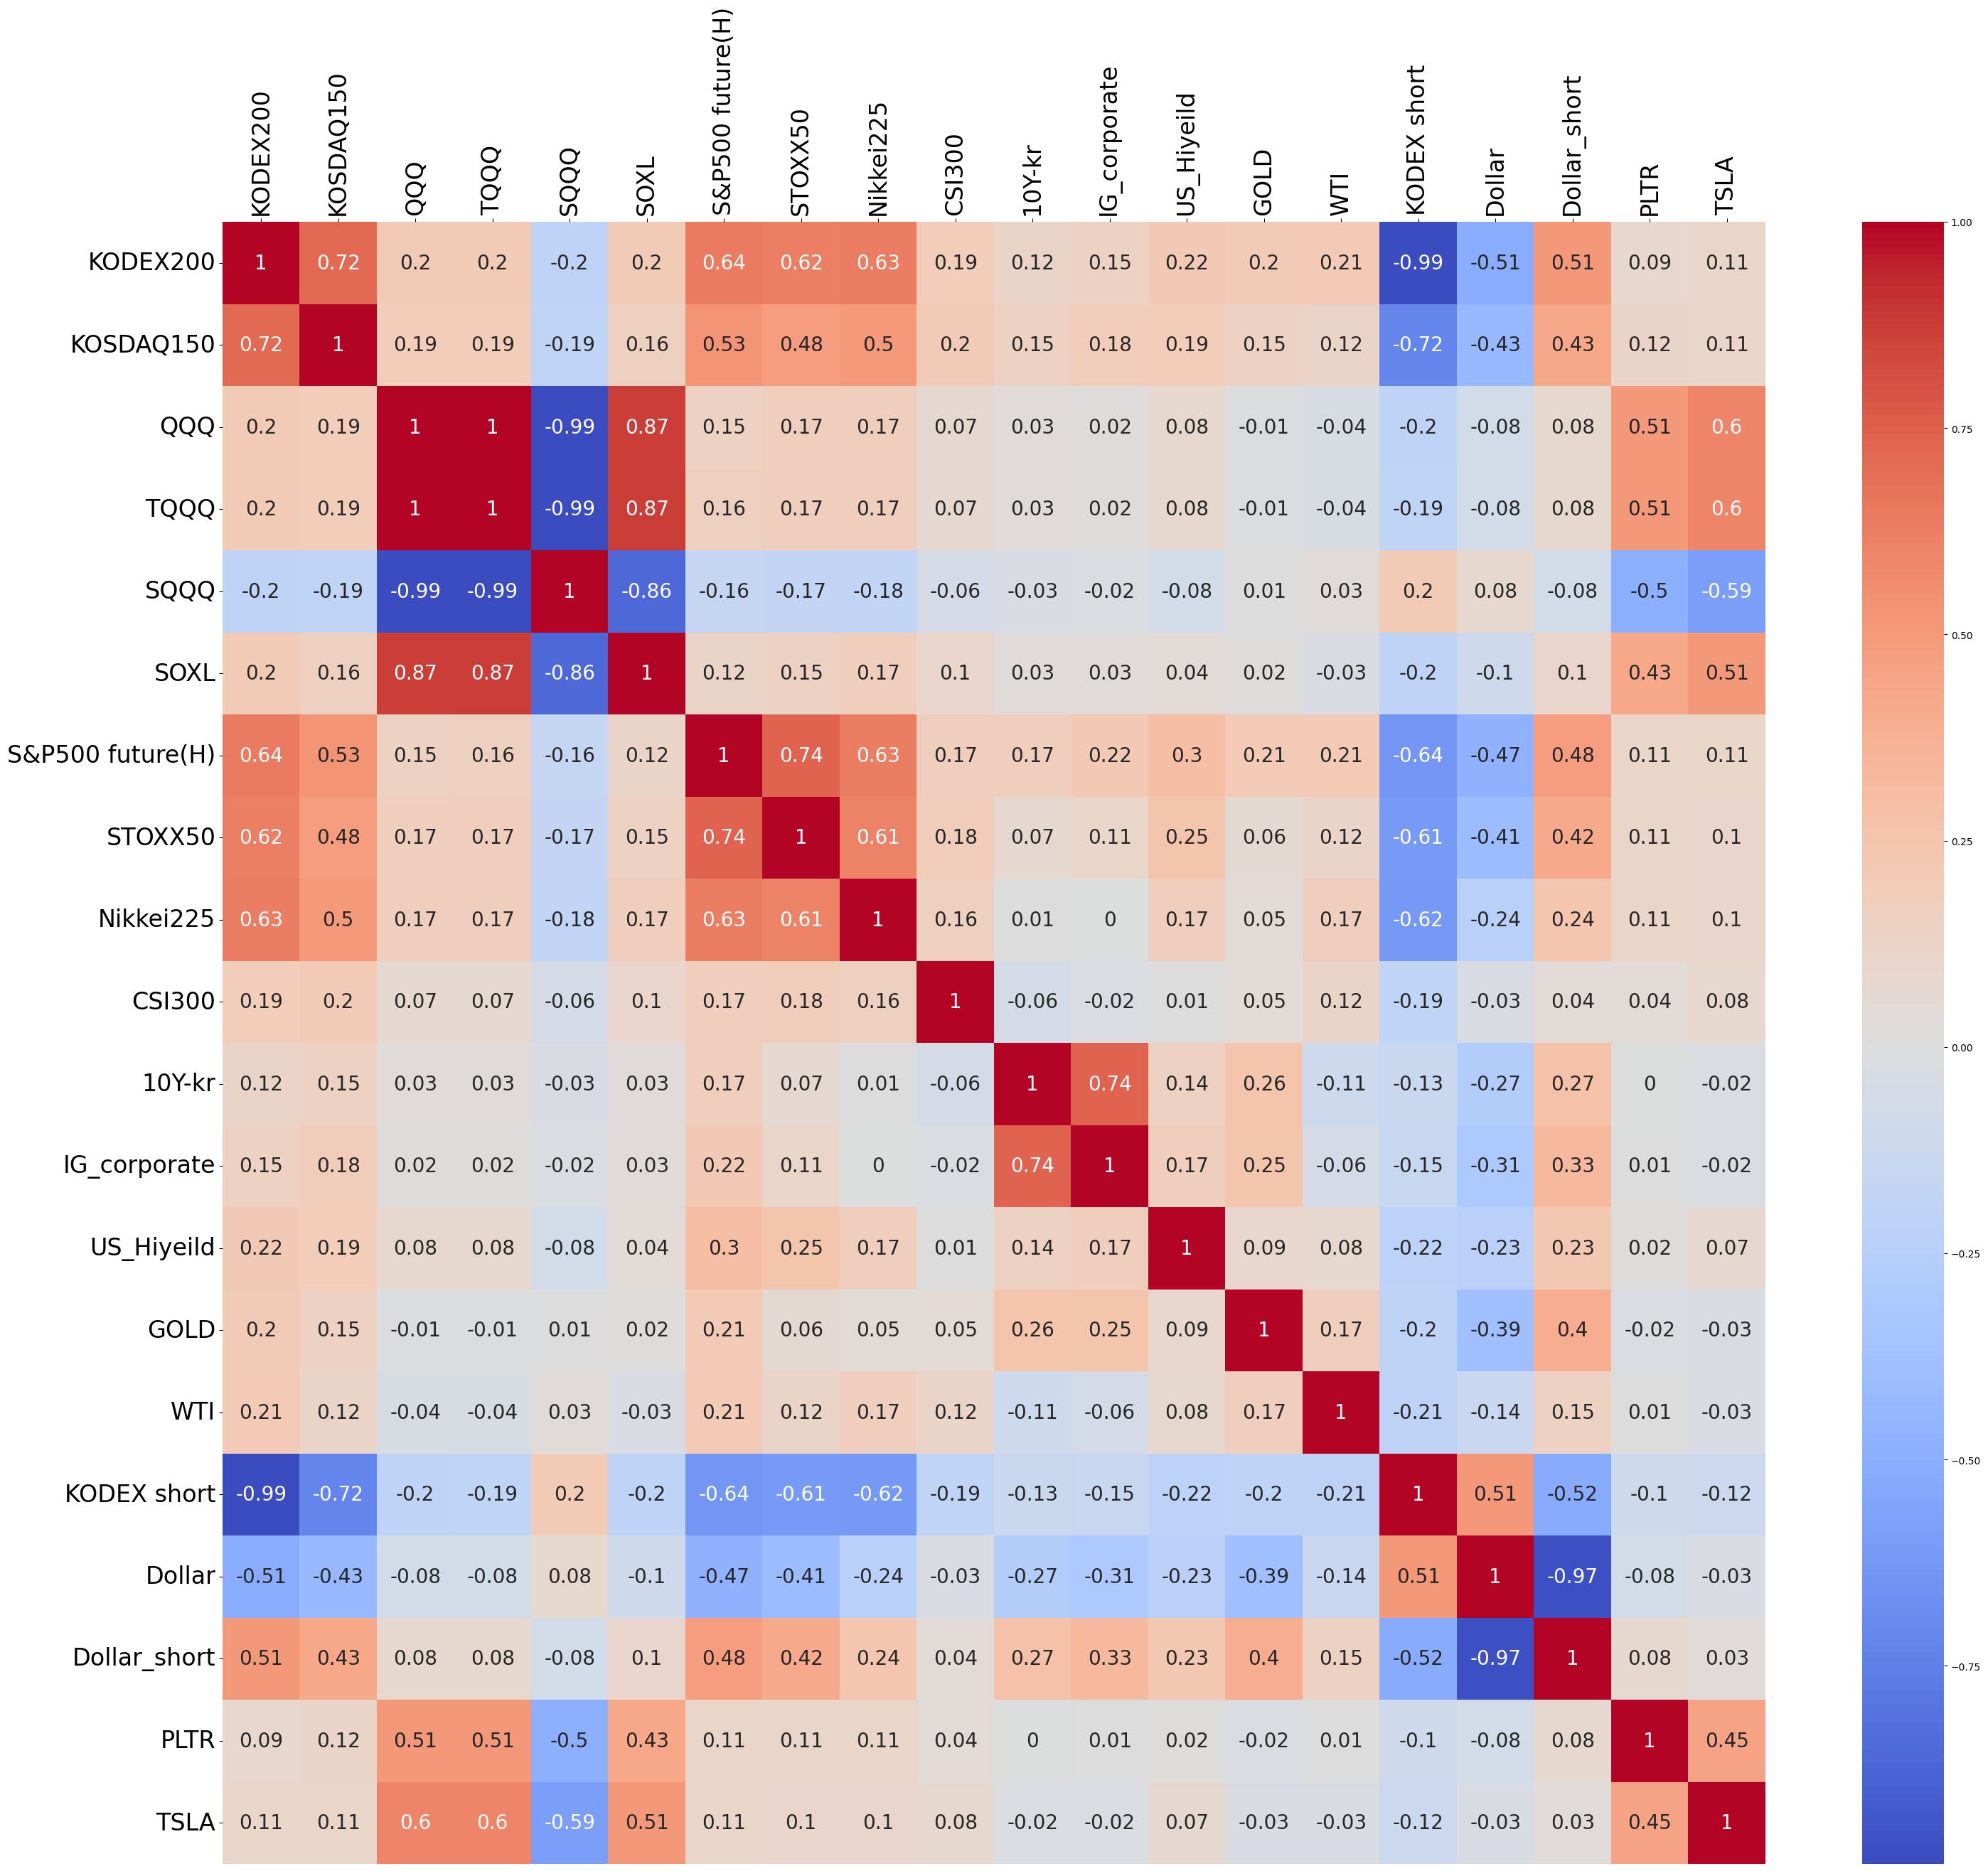

In [ ]:
#종목별 상관관계 분석
fig,axes=plt.subplots(ncols=1,nrows=1,figsize=(35,30))
ax0=axes
sns0=sns.heatmap(pct_df.corr().round(2), annot=True,cmap='coolwarm',ax=ax0,annot_kws={'size':20} )
sns0.xaxis.set_tick_params(labelsize=24)
sns0.yaxis.set_tick_params(labelsize=24)

sns0.set_xticklabels(sns0.get_xticklabels(), rotation=90)
sns0.set_yticklabels(sns0.get_yticklabels(), rotation=0)
sns0.xaxis.tick_top()


In [ ]:
#객체 구성
port=rp.Portfolio(returns=pct_df)
method_mu='hist'
method_cov='hist'

port.assets_stats(method_mu='hist', method_cov='hist')
w=port.optimization(model='Classic',rm='MV',obj='Sharpe',rf=0,l=0,hist='hist')

You must convert self.cov to a positive definite matrix


In [ ]:
#포트폴리오 개수 50개 만들기
points=50
frontier=port.efficient_frontier(model='Classic',rm='MV',points=points,rf=0,hist='hist')

In [ ]:
frontier.T*100

,KODEX200,KOSDAQ150,QQQ,TQQQ,SQQQ,SOXL,S&P500 future(H),STOXX50,Nikkei225,CSI300,10Y-kr,IG_corporate,US_Hiyeild,GOLD,WTI,KODEX short,Dollar,Dollar_short,PLTR,TSLA
0,2.102688e+01,4.572752e-05,5.895190e+00,1.817838e-05,2.030668,3.429071e-02,3.869032e-05,1.614647e-02,4.818816e-04,1.225326e-03,4.313939e-05,1.395283e+01,2.630202e-01,6.128908e-05,2.650901e-02,2.081500e+01,1.817313e+01,1.773252e+01,1.923512e-02,1.267380e-02
1,3.034138e+01,3.471680e-01,1.399069e-06,1.542417e+01,16.302001,4.853683e-01,9.752858e-08,9.145880e-08,7.478643e-08,4.165472e-07,1.973993e-01,1.394831e-06,3.109121e-07,1.668823e-07,3.596500e-08,3.085329e+01,1.801812e+00,4.247415e+00,2.826101e-08,3.504866e-08
2,1.891077e+01,7.523713e-01,1.203900e-07,2.750398e+01,28.966502,7.955843e-01,2.692455e-08,3.696076e-08,4.598261e-08,1.118021e-07,2.538835e-07,1.205283e-07,9.698358e-08,5.498287e-08,6.178078e-08,2.011425e+01,1.393793e-07,2.956544e+00,1.110811e-08,2.799920e-08
3,6.077155e+00,1.151833e+00,7.500874e-07,3.919717e+01,41.229845,1.098223e+00,2.128239e-07,2.778933e-07,3.691170e-07,8.257839e-07,1.265728e-06,7.365900e-07,6.586530e-07,4.348838e-07,5.743372e-07,7.950169e+00,7.254529e-07,3.295594e+00,8.442026e-08,1.828583e-07
4,1.054451e-07,1.692990e-07,1.045445e-07,4.523346e+01,51.407169,3.359368e+00,7.621533e-08,7.940115e-08,7.832912e-08,1.011068e-07,1.026276e-07,9.428527e-08,9.262172e-08,8.879695e-08,7.518427e-08,1.119769e-07,8.227104e-08,1.264874e-07,6.944401e-08,1.276682e-07
5,9.702126e-09,1.349021e-08,1.013882e-08,3.919722e+01,53.180993,7.621787e+00,7.743138e-09,7.898375e-09,7.659088e-09,9.683794e-09,9.661024e-09,9.074807e-09,8.912257e-09,8.559757e-09,7.186925e-09,1.050527e-08,8.153391e-09,1.125282e-08,8.302263e-09,1.458348e-08
6,2.502265e-08,3.415413e-08,2.632983e-08,3.478773e+01,54.476776,1.073549e+01,2.029582e-08,2.062651e-08,1.994452e-08,2.512638e-08,2.497096e-08,2.353990e-08,2.311948e-08,2.221776e-08,1.865360e-08,2.712228e-08,2.124648e-08,2.884432e-08,2.254155e-08,3.926078e-08
7,4.623582e-08,6.258632e-08,4.879138e-08,3.086511e+01,55.629482,1.350540e+01,3.778507e-08,3.833395e-08,3.701698e-08,4.655363e-08,4.617209e-08,4.359927e-08,4.282304e-08,4.116590e-08,3.456675e-08,5.008564e-08,3.942987e-08,5.313738e-08,4.271836e-08,7.413372e-08
8,1.174300e-08,1.600508e-08,1.220755e-08,2.718036e+01,56.712286,1.610736e+01,9.561064e-09,9.703183e-09,9.377676e-09,1.175902e-08,1.154833e-08,1.094837e-08,1.073404e-08,1.032659e-08,8.831837e-09,1.244580e-08,9.883801e-09,1.338086e-08,1.114996e-08,1.959732e-08
9,6.682339e-09,8.855274e-09,7.094311e-09,2.363456e+01,57.754085,1.861135e+01,5.526340e-09,5.593225e-09,5.390357e-09,6.757986e-09,6.686911e-09,6.353822e-09,6.225268e-09,5.980453e-09,5.035498e-09,7.292101e-09,5.781218e-09,7.656834e-09,6.304218e-09,1.077700e-08


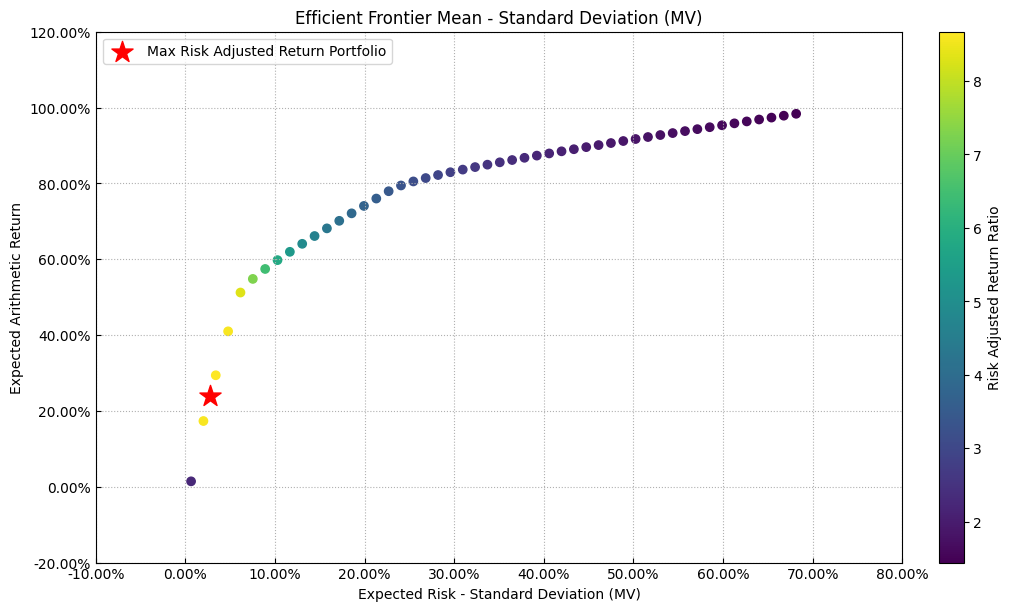

In [ ]:
#효율적 투자선 그래프
label='Max Risk Adjusted Return Portfolio'
mu=port.mu
cov=port.cov
returns=port.returns
ax=rp.plot_frontier(w_frontier=frontier,
                   mu=mu,
                    cov=cov,
                    returns=returns,
                    rm='MV',
                    rf=0,
                    alpha=0.05,
                    cmap='viridis',
                    w=w,
                    label=label,
                    marker='*',
                    s=16,
                    c='r',
                    height=6,
                    width=10,
                    ax=None
                   )

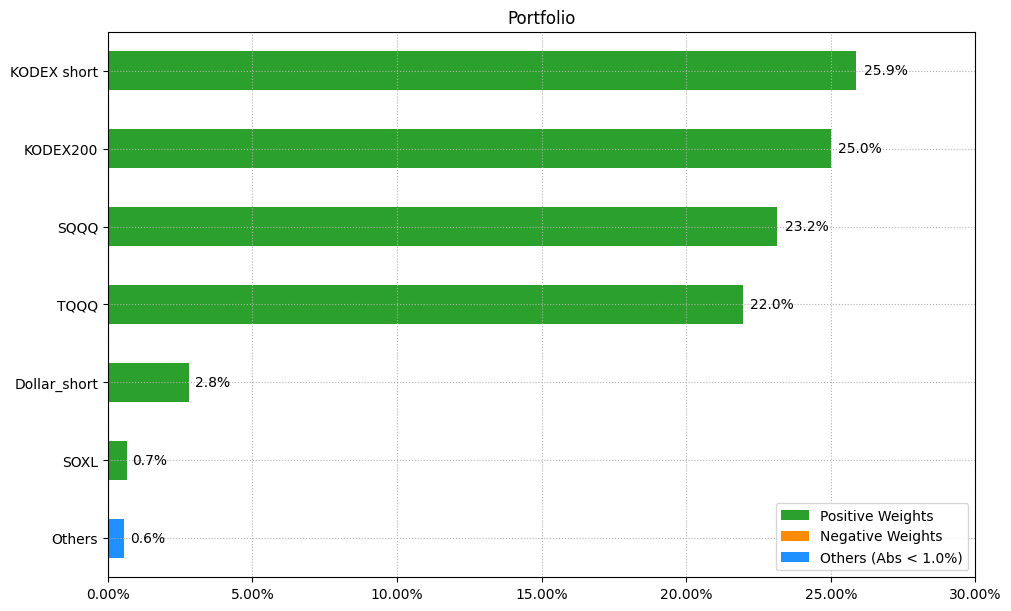

In [ ]:
#최적화된 포트폴리오 구성 확인하기
w=port.optimization(model='Classic',rm='MV',obj='Sharpe',rf=0,l=0,hist='hist')
w.T*100
ax=rp.plot_bar(w=w,title='Portfolio',kind='h',ax=None)

In [ ]:
# 최소분산 포트폴리오

In [ ]:
# 객체 구성
port=rp.Portfolio(returns=pct_df)
method_mu='hist'
method_cov='hist'
port.assets_stats(method_mu='hist',method_cov='hist')

model='Classic'
rm='MV'
obj='MinRisk'
hist=True
rf=0
b = None
l=0

w=port.optimization(model=model,rm=rm,obj=obj,rf=rf,l=l,hist=hist)
(w*100).T

You must convert self.cov to a positive definite matrix


,KODEX200,KOSDAQ150,QQQ,TQQQ,SQQQ,SOXL,S&P500 future(H),STOXX50,Nikkei225,CSI300,10Y-kr,IG_corporate,US_Hiyeild,GOLD,WTI,KODEX short,Dollar,Dollar_short,PLTR,TSLA
weights,21.026883,0.000046,5.89519,0.000018,2.030668,0.034291,0.000039,0.016146,0.000482,0.001225,0.000043,13.95283,0.26302,0.000061,0.026509,20.814995,18.173127,17.732518,0.019235,0.012674


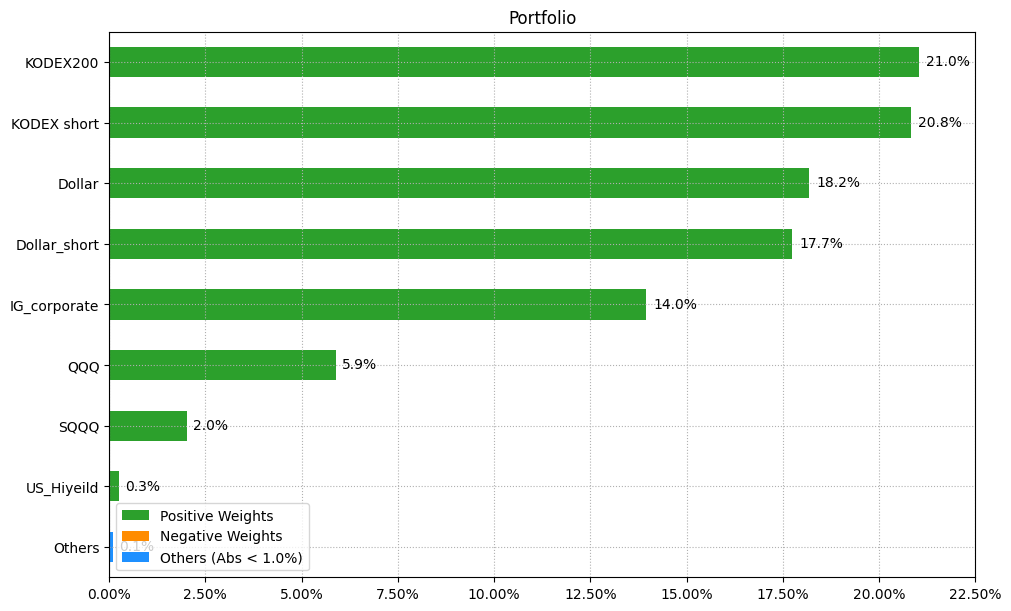

In [ ]:
# 투자 비중에 제약이 없을 경우의 포트폴리오 (: 가중치 없는 경우)
ax=rp.plot_bar(w=w,title='Portfolio',kind='h',ax=None)

In [ ]:
points=50
frontier=port.efficient_frontier(model='Classic',rm='MV',points=points,rf=0,hist='hist')

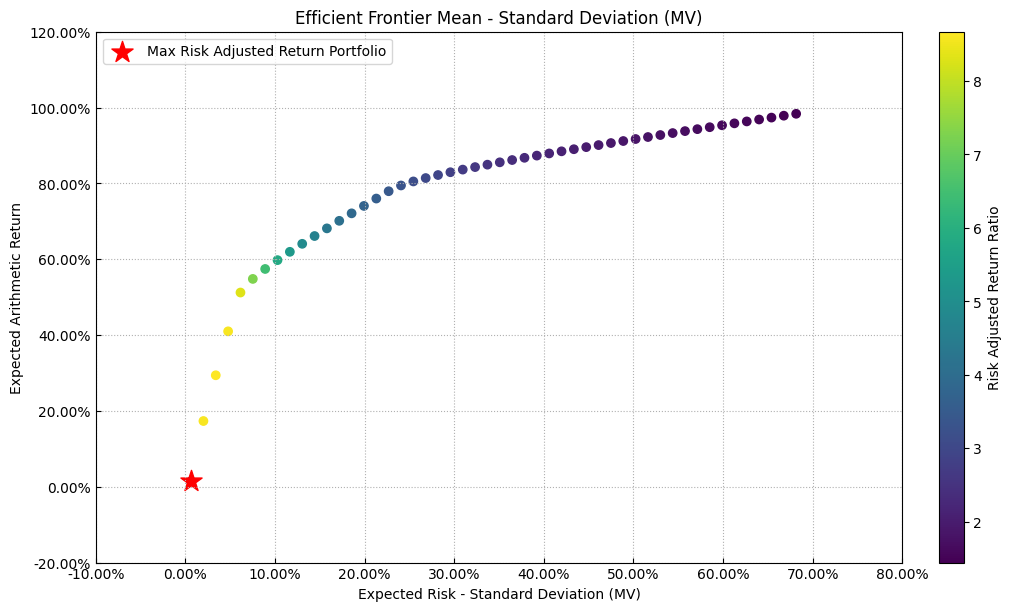

In [ ]:
label='Max Risk Adjusted Return Portfolio'
mu=port.mu
cov=port.cov
returns=port.returns
ax=rp.plot_frontier(w_frontier=frontier,
                   mu=mu,
                    cov=cov,
                    returns=returns,
                    rm='MV',
                    rf=0,
                    alpha=0.05,
                    cmap='viridis',
                    w=w,
                    label=label,
                    marker='*',
                    s=16,
                    c='r',
                    height=6,
                    width=10,
                    ax=None
                   )

In [ ]:
# 투자 비중에 제약이 있을 경우 (: 가중치 조절이 있는 경우)

# 종목을 구성
asset_classes={
    'Asset':
    [
        'KODEX200','KOSDAQ150','QQQ','TQQQ','SQQQ','SOXL','S&P500 future(H)','STOXX50','Nikkei225','CSI300','10Y-kr','IG_corporate','US_Hiyeild','GOLD','WTI','KODEX short','Dollar','Dollar_short','PLTR','TSLA'
    ],

    'Class':
    [
        '국내시장','국내시장','해외시장','해외시장','해외시장','해외시장','해외시장','해외시장','해외시장','해외시장','채권','채권','채권','원자재','원자재','파생','외환','파생','미국주식','미국주식']

}
asset_classes=pd.DataFrame(asset_classes)
asset_classes

,Asset,Class
0,KODEX200,국내시장
1,KOSDAQ150,국내시장
2,QQQ,해외시장
3,TQQQ,해외시장
4,SQQQ,해외시장
5,SOXL,해외시장
6,S&P500 future(H),해외시장
7,STOXX50,해외시장
8,Nikkei225,해외시장
9,CSI300,해외시장


In [ ]:
# 종목의 가중치 조절
constraints = {
    'Disabled': [False] * 40,
    'Type': ['Assets'] * 40,
    'Set': ['Assets'] * 40,
    'Position': [
        'KODEX200','KOSDAQ150','QQQ','TQQQ','SQQQ','SOXL','S&P500 future(H)','STOXX50','Nikkei225','CSI300','10Y-kr','IG_corporate','US_Hiyeild','GOLD','WTI','KODEX short','Dollar','Dollar_short','PLTR','TSLA',
        'KODEX200','KOSDAQ150','QQQ','TQQQ','SQQQ','SOXL','S&P500 future(H)','STOXX50','Nikkei225','CSI300','10Y-kr','IG_corporate','US_Hiyeild','GOLD','WTI','KODEX short','Dollar','Dollar_short','PLTR','TSLA'
    ],
    'Sign': ['>='] * 20 + ['<='] * 20,
    'Weight': [
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.10,0.10,0.20,0.20,0.20,0.20,0.20,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.20,0.05,0.20,0.20
    ],
    'Type Relative': [''] * 40,
    'Relative Set': [''] * 40,
    'Relative': [''] * 40,
    'Factor': [''] * 40
}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Assets,Assets,KODEX200,>=,0.00,,,,
1,False,Assets,Assets,KOSDAQ150,>=,0.00,,,,
2,False,Assets,Assets,QQQ,>=,0.00,,,,
3,False,Assets,Assets,TQQQ,>=,0.00,,,,
4,False,Assets,Assets,SQQQ,>=,0.00,,,,
5,False,Assets,Assets,SOXL,>=,0.00,,,,
6,False,Assets,Assets,S&P500 future(H),>=,0.00,,,,
7,False,Assets,Assets,STOXX50,>=,0.00,,,,
8,False,Assets,Assets,Nikkei225,>=,0.00,,,,
9,False,Assets,Assets,CSI300,>=,0.00,,,,


In [ ]:
# 포트폴리오 최적화 과정
A, B = rp.assets_constraints(constraints, asset_classes)

port.ainequality = A
port.binequality = B

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)


w.T*100

,KODEX200,KOSDAQ150,QQQ,TQQQ,SQQQ,SOXL,S&P500 future(H),STOXX50,Nikkei225,CSI300,10Y-kr,IG_corporate,US_Hiyeild,GOLD,WTI,KODEX short,Dollar,Dollar_short,PLTR,TSLA
weights,9.999999,0.460165,19.999999,0.512047,7.496967,0.118452,0.000019,1.603715,0.077597,0.458088,6.9299,9.999999,8.063198,2.42391,0.41481,9.999999,16.275054,5.0,0.133242,0.03284


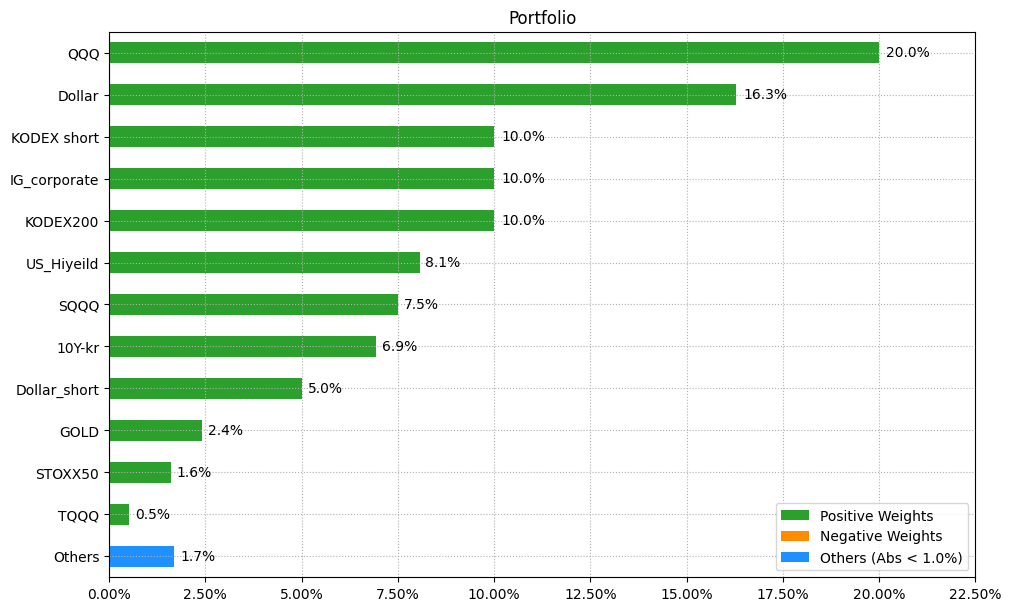

In [ ]:
# 가중치 조절한 후의 포트폴리오
ax=rp.plot_bar(w=w,title='Portfolio',kind='h', ax=None)

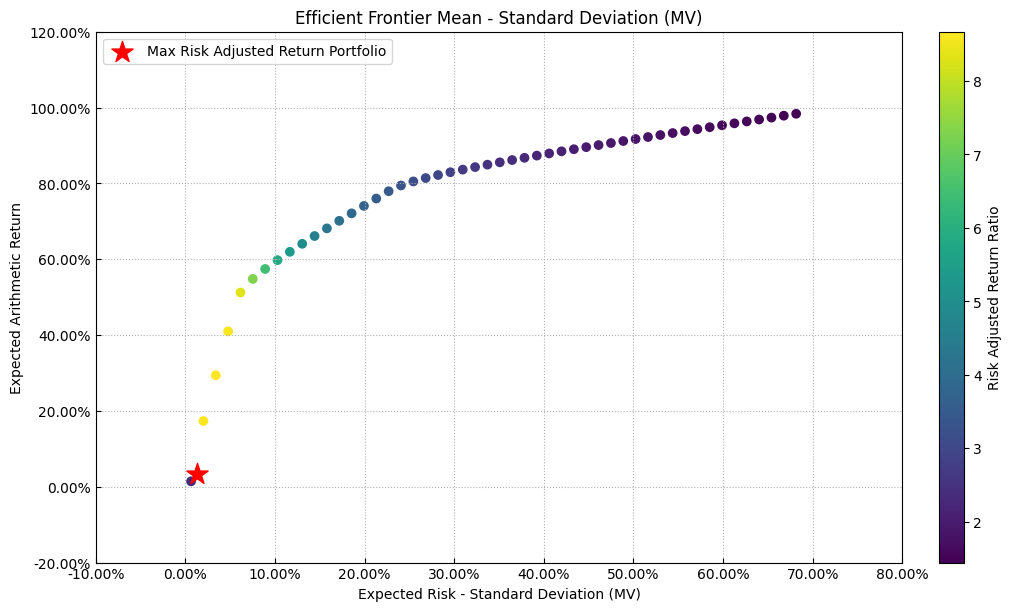

In [ ]:
# 가중치 조절한 포트폴리오의 수익률 그래프
label='Max Risk Adjusted Return Portfolio'
mu=port.mu
cov=port.cov
returns=port.returns
ax=rp.plot_frontier(w_frontier=frontier,
                   mu=mu,
                    cov=cov,
                    returns=returns,
                    rm='MV',
                    rf=0,
                    alpha=0.05,
                    cmap='viridis',
                    w=w,
                    label=label,
                    marker='*',
                    s=16,
                    c='r',
                    height=6,
                    width=10,
                    ax=None
                   )